In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [16]:

img1 = cv.imread('/content/drive/MyDrive/Visión Por computadora/SEM 6/Ims/land1.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('/content/drive/MyDrive/Visión Por computadora/SEM 6/Ims/src1.jpg',cv.IMREAD_GRAYSCALE)   # trainImage

img3 = cv.imread('/content/drive/MyDrive/Visión Por computadora/SEM 6/Ims/land0.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img4 = cv.imread('/content/drive/MyDrive/Visión Por computadora/SEM 6/Ims/src0.jpg',cv.IMREAD_GRAYSCALE)   # trainImage

img5 = cv.imread('/content/drive/MyDrive/Visión Por computadora/SEM 6/Ims/land2.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img6 = cv.imread('/content/drive/MyDrive/Visión Por computadora/SEM 6/Ims/src2.jpg',cv.IMREAD_GRAYSCALE)   # trainImage

img7 = cv.imread('/content/drive/MyDrive/Visión Por computadora/SEM 6/Ims/land3.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img8 = cv.imread('/content/drive/MyDrive/Visión Por computadora/SEM 6/Ims/src3.jpg',cv.IMREAD_GRAYSCALE)   # trainImage



In [4]:
# Convertir la imagen de entrenamiento a BGR para poder dibujar el rectángulo en color
img_boxed = cv.cvtColor(img2, cv.COLOR_GRAY2BGR)

In [5]:
# Initiate ORB detector
orb = cv.ORB_create()


In [6]:
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [7]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

In [8]:
# Match descriptors.
matches = bf.match(des1,des2)

In [9]:
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

In [10]:
# Crear una lista de puntos clave en la imagen de entrenamiento de las mejores coincidencias
pts_train = np.float32([kp2[m.trainIdx].pt for m in matches[:10]])

In [11]:
# Encontrar la caja delimitadora alrededor del objeto detectado
x, y, w, h = cv.boundingRect(pts_train)

In [12]:
# Dibujar el rectángulo rojo en la imagen de entrenamiento

cv.rectangle(img_boxed, (x, y), (x + w, y + h), (0, 0, 255), 2)

array([[[ 79,  79,  79],
        [ 54,  54,  54],
        [ 31,  31,  31],
        ...,
        [114, 114, 114],
        [222, 222, 222],
        [213, 213, 213]],

       [[ 92,  92,  92],
        [ 65,  65,  65],
        [ 36,  36,  36],
        ...,
        [104, 104, 104],
        [236, 236, 236],
        [255, 255, 255]],

       [[116, 116, 116],
        [ 88,  88,  88],
        [ 58,  58,  58],
        ...,
        [ 71,  71,  71],
        [233, 233, 233],
        [253, 253, 253]],

       ...,

       [[193, 193, 193],
        [198, 198, 198],
        [192, 192, 192],
        ...,
        [234, 234, 234],
        [206, 206, 206],
        [173, 173, 173]],

       [[204, 204, 204],
        [208, 208, 208],
        [198, 198, 198],
        ...,
        [199, 199, 199],
        [171, 171, 171],
        [133, 133, 133]],

       [[211, 211, 211],
        [212, 212, 212],
        [201, 201, 201],
        ...,
        [166, 166, 166],
        [143, 143, 143],
        [129, 129, 129]]

In [13]:
# Apilar las imágenes horizontalmente para mostrarlas juntas
img_matches = cv.drawMatches(img1, kp1, img_boxed, kp2, matches[:15], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


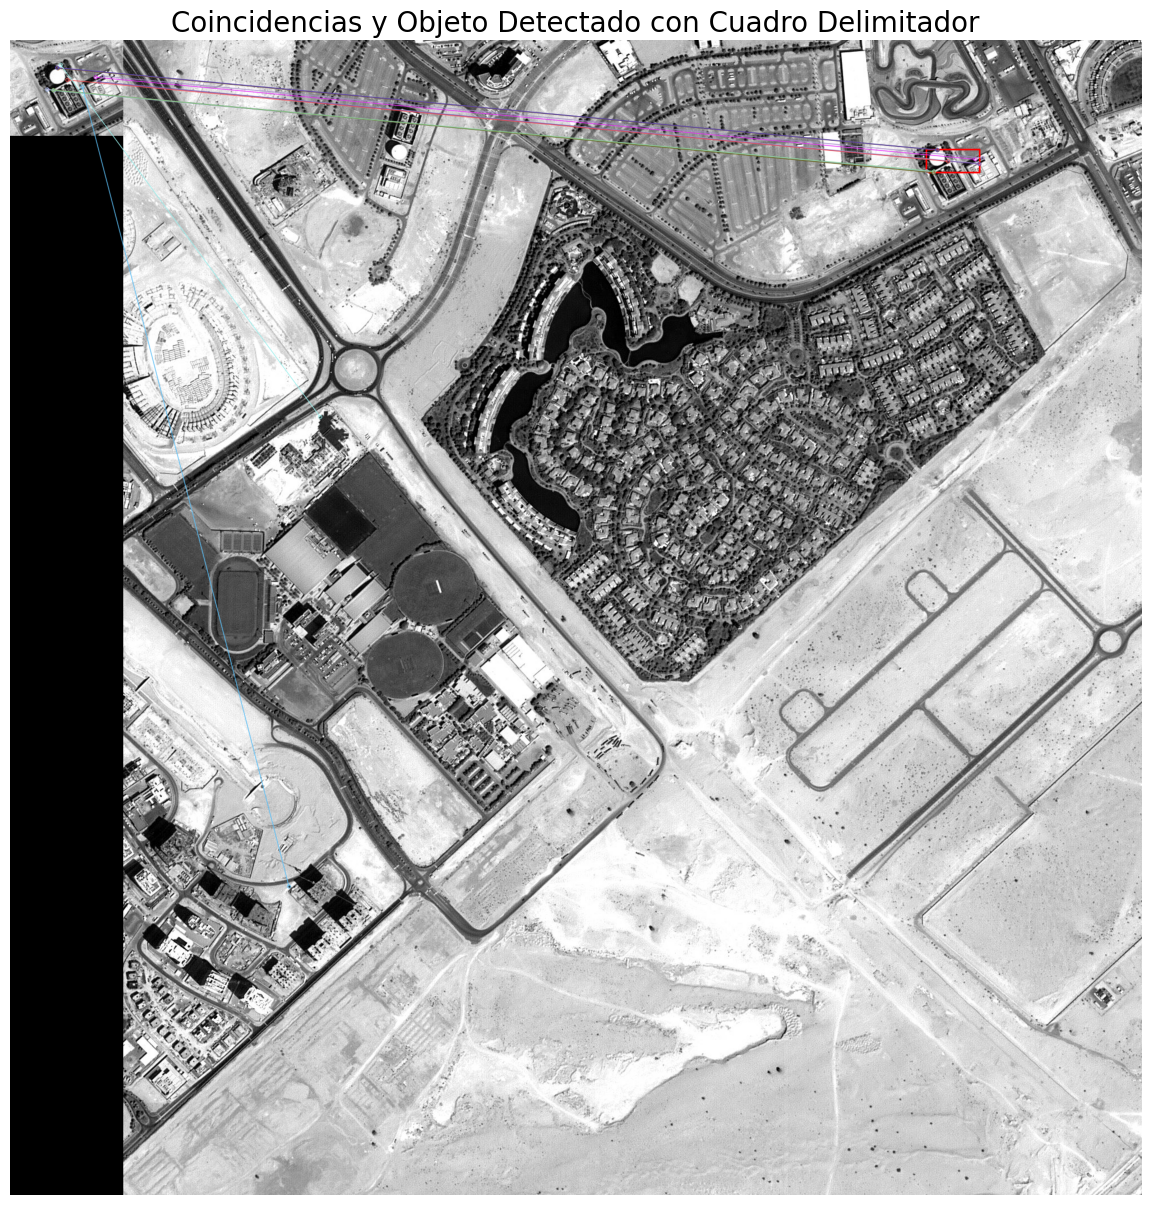

In [17]:
# Mostrar la imagen con las coincidencias y el cuadro delimitador
plt.figure(figsize=(15, 15))
plt.imshow(cv.cvtColor(img_matches, cv.COLOR_BGR2RGB))
plt.title('Coincidencias y Objeto Detectado con Cuadro Delimitador', fontsize=20)
plt.axis('off')
plt.show()

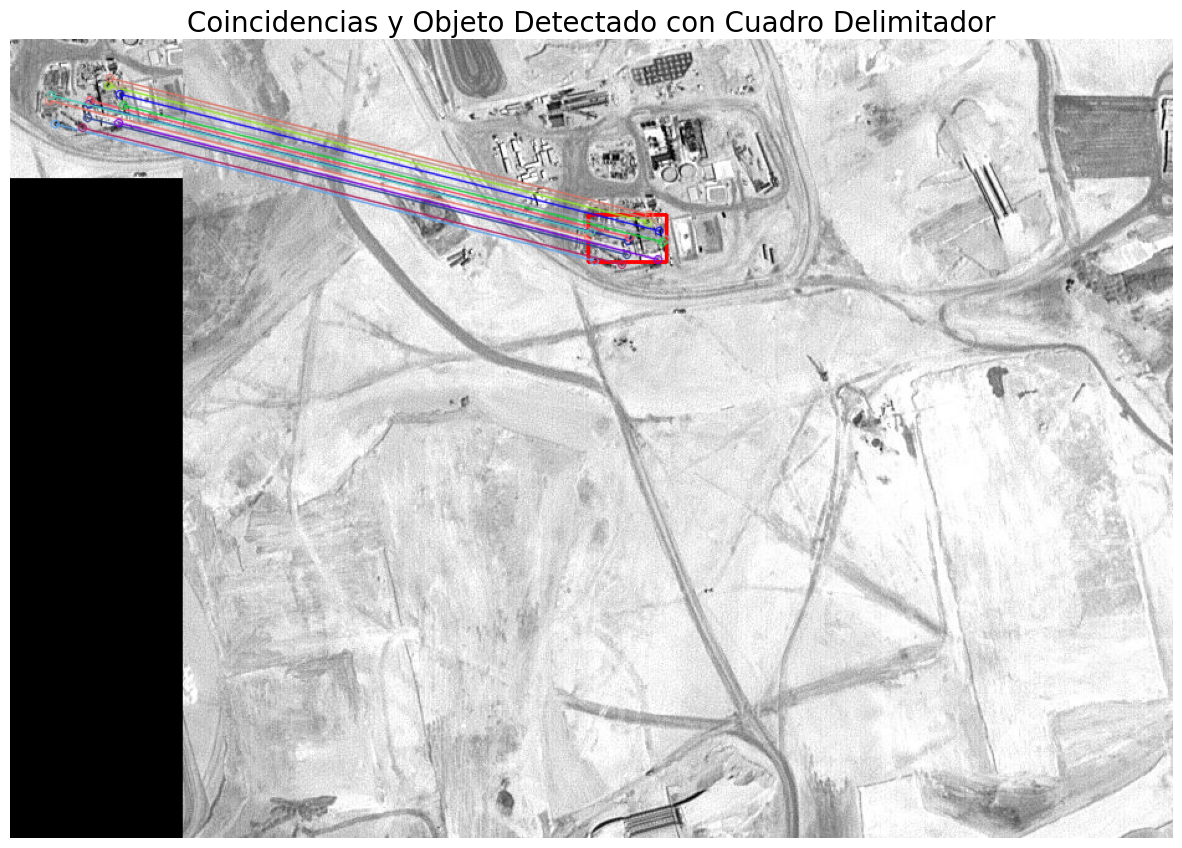

In [20]:
# Convertir la imagen de entrenamiento a BGR para poder dibujar el rectángulo en color
img_boxed = cv.cvtColor(img4, cv.COLOR_GRAY2BGR)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img3,None)
kp2, des2 = orb.detectAndCompute(img4,None)
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Crear una lista de puntos clave en la imagen de entrenamiento de las mejores coincidencias
pts_train = np.float32([kp2[m.trainIdx].pt for m in matches[:10]])
# Encontrar la caja delimitadora alrededor del objeto detectado
x, y, w, h = cv.boundingRect(pts_train)
# Dibujar el rectángulo rojo en la imagen de entrenamiento

cv.rectangle(img_boxed, (x, y), (x + w, y + h), (0, 0, 255), 2)
# Apilar las imágenes horizontalmente para mostrarlas juntas
img_matches = cv.drawMatches(img3, kp1, img_boxed, kp2, matches[:15], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# Mostrar la imagen con las coincidencias y el cuadro delimitador
plt.figure(figsize=(15, 15))
plt.imshow(cv.cvtColor(img_matches, cv.COLOR_BGR2RGB))
plt.title('Coincidencias y Objeto Detectado con Cuadro Delimitador', fontsize=20)
plt.axis('off')
plt.show()

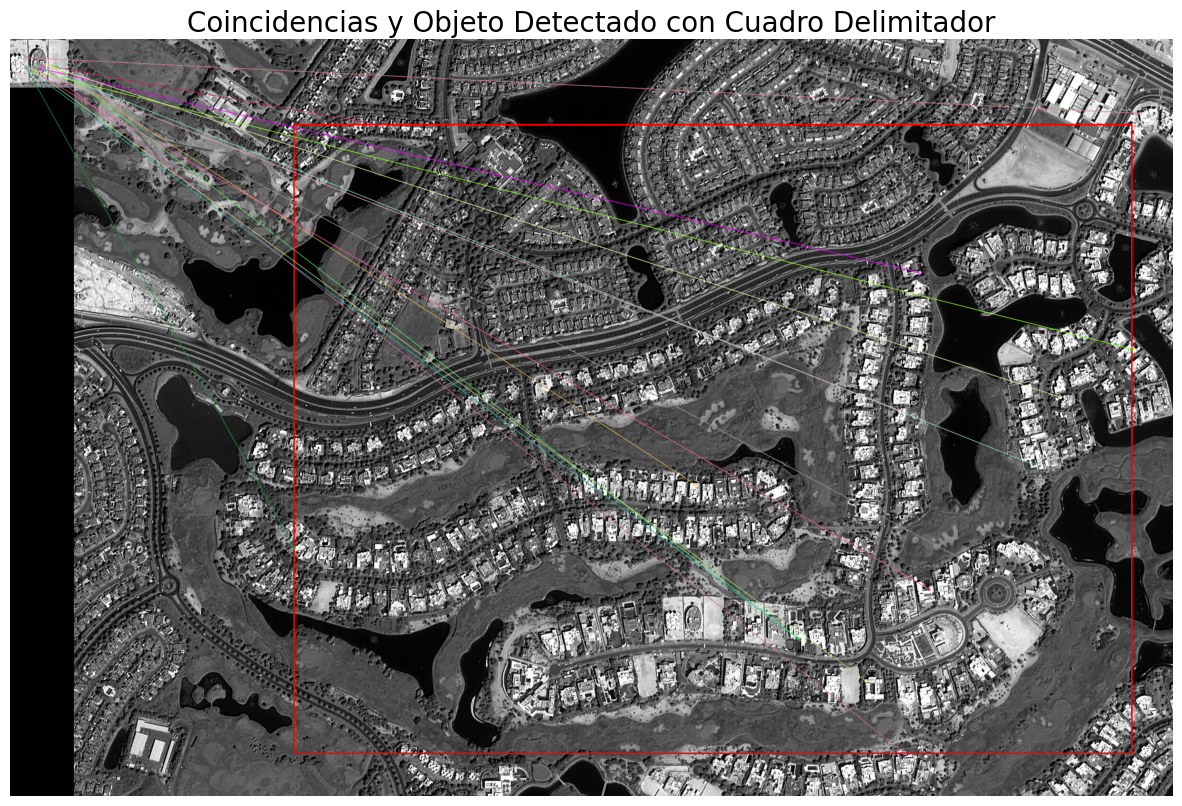

In [21]:
# Convertir la imagen de entrenamiento a BGR para poder dibujar el rectángulo en color
img_boxed = cv.cvtColor(img6, cv.COLOR_GRAY2BGR)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img5,None)
kp2, des2 = orb.detectAndCompute(img6,None)
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Crear una lista de puntos clave en la imagen de entrenamiento de las mejores coincidencias
pts_train = np.float32([kp2[m.trainIdx].pt for m in matches[:10]])
# Encontrar la caja delimitadora alrededor del objeto detectado
x, y, w, h = cv.boundingRect(pts_train)
# Dibujar el rectángulo rojo en la imagen de entrenamiento

cv.rectangle(img_boxed, (x, y), (x + w, y + h), (0, 0, 255), 2)
# Apilar las imágenes horizontalmente para mostrarlas juntas
img_matches = cv.drawMatches(img5, kp1, img_boxed, kp2, matches[:15], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# Mostrar la imagen con las coincidencias y el cuadro delimitador
plt.figure(figsize=(15, 15))
plt.imshow(cv.cvtColor(img_matches, cv.COLOR_BGR2RGB))
plt.title('Coincidencias y Objeto Detectado con Cuadro Delimitador', fontsize=20)
plt.axis('off')
plt.show()

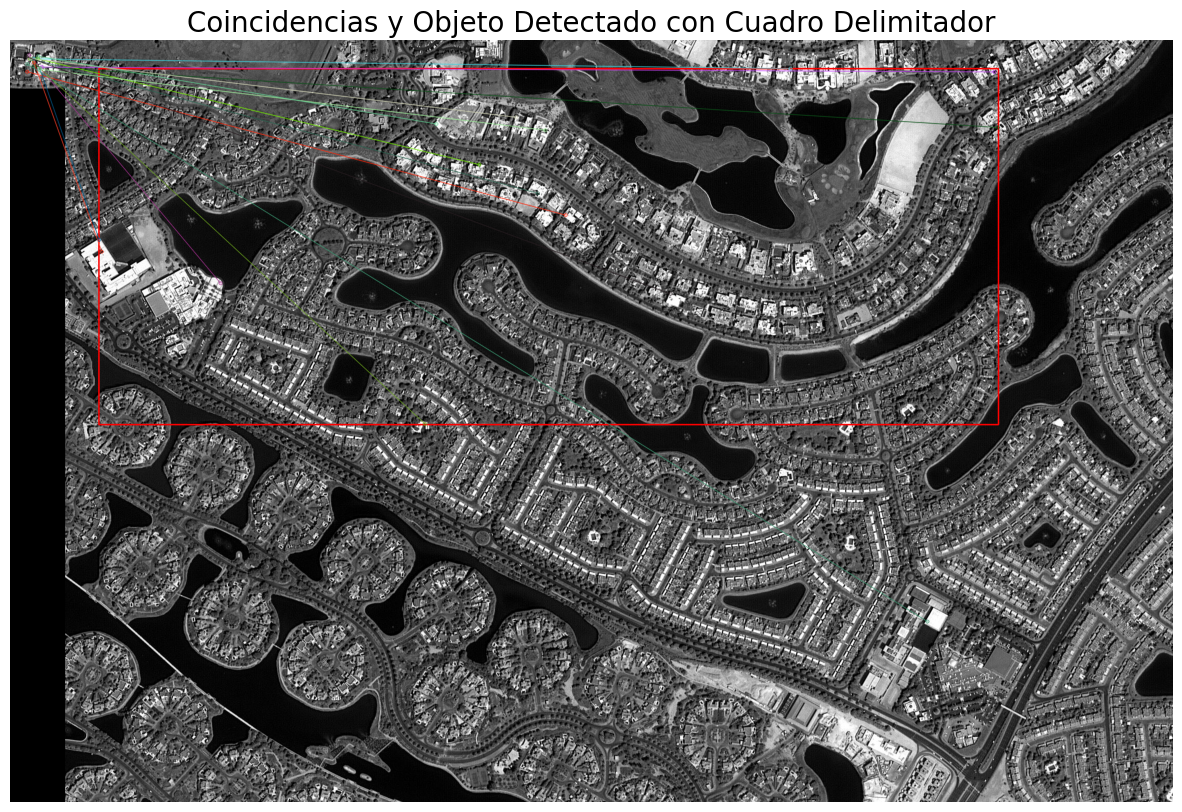

In [22]:
# Convertir la imagen de entrenamiento a BGR para poder dibujar el rectángulo en color
img_boxed = cv.cvtColor(img8, cv.COLOR_GRAY2BGR)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img7,None)
kp2, des2 = orb.detectAndCompute(img8,None)
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Crear una lista de puntos clave en la imagen de entrenamiento de las mejores coincidencias
pts_train = np.float32([kp2[m.trainIdx].pt for m in matches[:10]])
# Encontrar la caja delimitadora alrededor del objeto detectado
x, y, w, h = cv.boundingRect(pts_train)
# Dibujar el rectángulo rojo en la imagen de entrenamiento

cv.rectangle(img_boxed, (x, y), (x + w, y + h), (0, 0, 255), 2)
# Apilar las imágenes horizontalmente para mostrarlas juntas
img_matches = cv.drawMatches(img7, kp1, img_boxed, kp2, matches[:15], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# Mostrar la imagen con las coincidencias y el cuadro delimitador
plt.figure(figsize=(15, 15))
plt.imshow(cv.cvtColor(img_matches, cv.COLOR_BGR2RGB))
plt.title('Coincidencias y Objeto Detectado con Cuadro Delimitador', fontsize=20)
plt.axis('off')
plt.show()